# Lecture 04 Demos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

## Demo 1: fun with square waves

In [2]:
tone = 65           # A frequency in Hz
duration = 2         # The length of the audio signal (in seconds)
sample_rate = 48000  # The number of samples per second to take
t_range = np.linspace(0, duration, sample_rate * duration) # Range of time

In [3]:
def ideal_square_wave(t, freq):
    return 4 * np.floor(freq * t) - 2 * np.floor(2 * freq * t)

In [4]:
ideal_square_wave_samples = ideal_square_wave(t_range, tone)

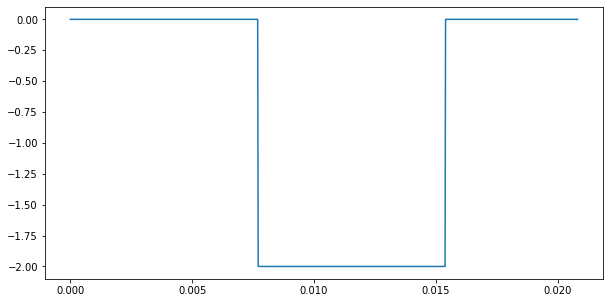

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(t_range[:1000], ideal_square_wave_samples[:1000])

In [6]:
Audio(ideal_square_wave_samples, rate=sample_rate)

In [7]:
def square_wave_coefficients(k):
    return (k % 2) * 4 / (k * np.pi)

def square_wave_truncated(t, freq, max_k):
    return np.sum([
        square_wave_coefficients(k) * np.sin(2 * np.pi * freq * k * t) for k in range(1, max_k+1)
    ])

In [8]:
bad_truncated_square_wave = np.array([square_wave_truncated(t, tone, 10) for t in t_range])
better_truncated_square_wave = np.array([square_wave_truncated(t, tone, 50) for t in t_range])

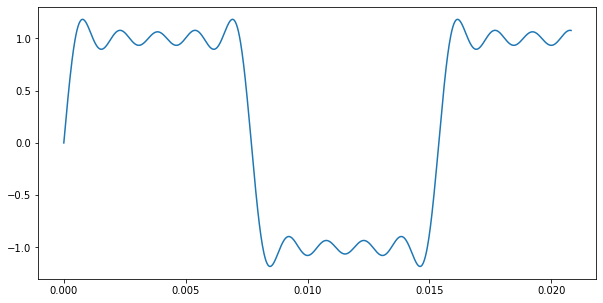

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(t_range[:1000], bad_truncated_square_wave[:1000])

In [10]:
Audio(bad_truncated_square_wave, rate=sample_rate)

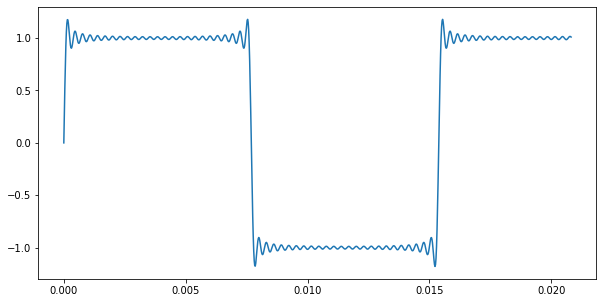

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(t_range[:1000], better_truncated_square_wave[:1000])

In [12]:
Audio(better_truncated_square_wave, rate=sample_rate)

## Demo 2: fun with sawtooth waves

In [13]:
def ideal_sawtooth_wave(t, freq):
    return 2 * (freq * t - np.floor(freq * t + 0.5))

In [14]:
ideal_sawtooth_wave_samples = ideal_sawtooth_wave(t_range, tone)

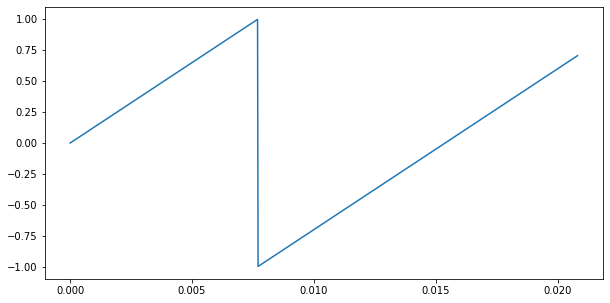

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(t_range[:1000], ideal_sawtooth_wave_samples[:1000])

In [16]:
Audio(ideal_sawtooth_wave_samples, rate=sample_rate)

In [17]:
def sawtooth_coefficients(k):
    return -(2 / np.pi) * ((-1) ** k) / k

def sawtooth_truncated(t, freq, max_k):
    return np.sum([sawtooth_coefficients(k) * np.sin(2 * np.pi * freq * k * t) for k in range(1, max_k+1)])

In [18]:
bad_truncated_sawtooth_wave = np.array([sawtooth_truncated(t, tone, 10) for t in t_range])
better_truncated_sawtooth_wave = np.array([sawtooth_truncated(t, tone, 50) for t in t_range])

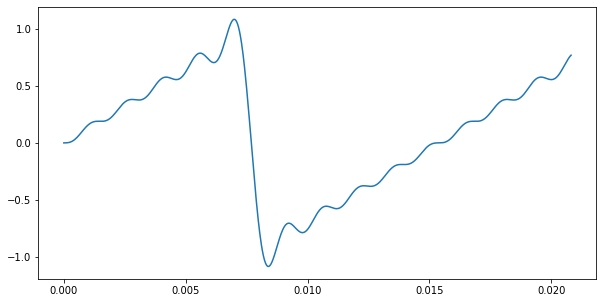

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(t_range[:1000], bad_truncated_sawtooth_wave[:1000])

In [20]:
Audio(bad_truncated_sawtooth_wave, rate=sample_rate)

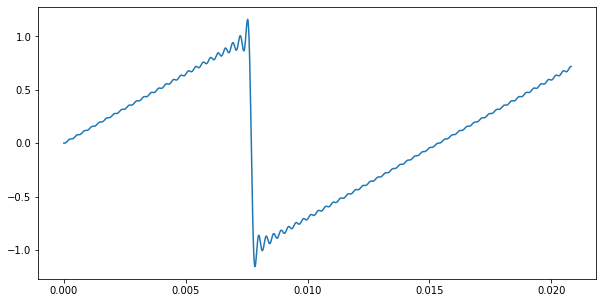

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(t_range[:1000], better_truncated_sawtooth_wave[:1000])

In [22]:
Audio(better_truncated_sawtooth_wave, rate=sample_rate)

## Try it yourself!

 - Implement the same functions for the [triangle wave](https://en.wikipedia.org/wiki/Triangle_wave)
 - Try applying a filtering technique called the [sigma approximation](https://en.wikipedia.org/wiki/Sigma_approximation) to reduce the effects of the Gibbs phenomenon (we will cover filters in lecture 6 next week)